In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Лига легенд - одна из самых популярных игр в жанре MOBA. Хоть по ней и не устраиваются международные турниры, но игроки по всему миру любят её за красочность, скорость и высокий темп. Также по ходу матча наблюдатели могут делать ставки на победу той или иной команды. Поэтому попытаемся предсказывать победы той или иной команды в зависимости от различной статистики за 14 минут игры.

In [2]:
info = pd.read_csv('matches_info_4_4.csv')
meta = pd.read_csv('matches_meta_4_4.csv')

В базе данных две таблицы - в одной числовая статистика, в другой - персонажи, выбранные игроками, результат матча и длина самой игры

In [3]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9190 entries, 0 to 9189
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   matchId          9190 non-null   object
 1   t1Dragons        9190 non-null   int64 
 2   t2Dragons        9190 non-null   int64 
 3   t1Rift           9190 non-null   int64 
 4   t2Rift           9190 non-null   int64 
 5   topGoldDiff      9190 non-null   int64 
 6   jgGoldDiff       9190 non-null   int64 
 7   midGoldDiff      9190 non-null   int64 
 8   adcGoldDiff      9190 non-null   int64 
 9   suppGoldDiff     9190 non-null   int64 
 10  t1TopTowerTaken  9190 non-null   int64 
 11  t1MidTowerTaken  9190 non-null   int64 
 12  t1BotTowerTaken  9190 non-null   int64 
 13  t2TopTowerTaken  9190 non-null   int64 
 14  t2MidTowerTaken  9190 non-null   int64 
 15  t2BotTowerTaken  9190 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 1.1+ MB


In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   matchId      10040 non-null  object
 1   gameLength   10040 non-null  int64 
 2   winningTeam  10040 non-null  int64 
 3   team1Top     10040 non-null  object
 4   team1Jg      10040 non-null  object
 5   team1Mid     10040 non-null  object
 6   team1Adc     10040 non-null  object
 7   team1Supp    10040 non-null  object
 8   team2Top     10040 non-null  object
 9   team2Jg      10040 non-null  object
 10  team2Mid     10040 non-null  object
 11  team2Adc     10040 non-null  object
 12  team2Supp    9941 non-null   object
dtypes: int64(2), object(11)
memory usage: 1019.8+ KB


Отбрасываем дубликаты и сливаем обе таблицы в одну, а именно в первую таблицу добавим номер матча, его длину и команду-победителя

In [5]:
meta.drop_duplicates(inplace=True)
meta.value_counts("matchId").sort_values(ascending=False)

matchId
NA1_4234668610    1
NA1_4234676520    1
NA1_4234678037    1
NA1_4234685183    1
NA1_4234695909    1
                 ..
NA1_4260902215    1
NA1_4260902510    1
NA1_4260903597    1
NA1_4260903696    1
NA1_4260911107    1
Length: 8193, dtype: int64

In [6]:
merged = pd.merge(info, meta[["matchId","gameLength","winningTeam"]],how="inner",on="matchId")

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8190
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   matchId          8191 non-null   object
 1   t1Dragons        8191 non-null   int64 
 2   t2Dragons        8191 non-null   int64 
 3   t1Rift           8191 non-null   int64 
 4   t2Rift           8191 non-null   int64 
 5   topGoldDiff      8191 non-null   int64 
 6   jgGoldDiff       8191 non-null   int64 
 7   midGoldDiff      8191 non-null   int64 
 8   adcGoldDiff      8191 non-null   int64 
 9   suppGoldDiff     8191 non-null   int64 
 10  t1TopTowerTaken  8191 non-null   int64 
 11  t1MidTowerTaken  8191 non-null   int64 
 12  t1BotTowerTaken  8191 non-null   int64 
 13  t2TopTowerTaken  8191 non-null   int64 
 14  t2MidTowerTaken  8191 non-null   int64 
 15  t2BotTowerTaken  8191 non-null   int64 
 16  gameLength       8191 non-null   int64 
 17  winningTeam      8191 non-null   

Построим матрицу корреляции и графики по разнице в золоте от роли

<AxesSubplot:>

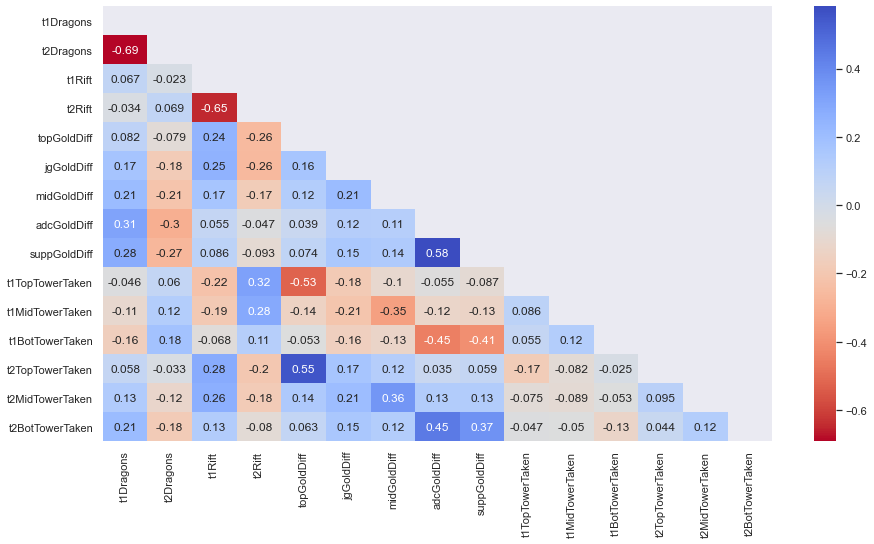

In [8]:
corr = merged.drop(["winningTeam","gameLength"],axis=1).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(corr,cmap="coolwarm_r",mask=mask,annot=True)

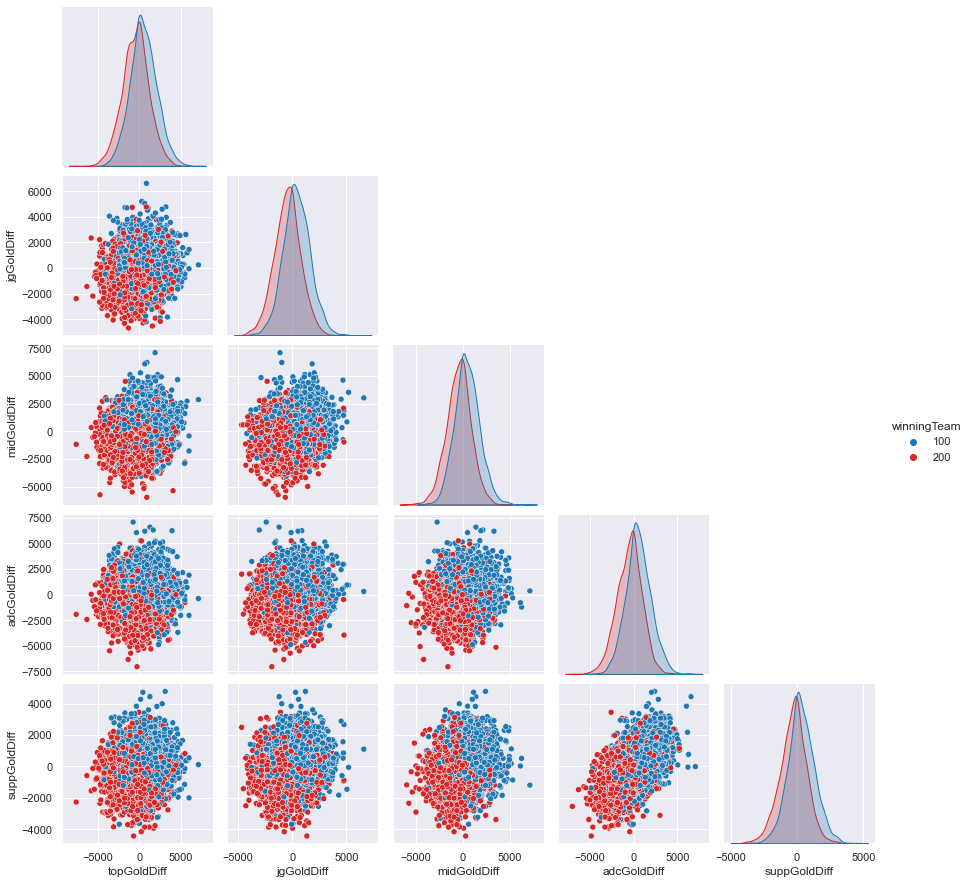

In [9]:
palette = ['tab:blue','tab:red']
sns.pairplot(merged,corner=True,x_vars=["topGoldDiff","jgGoldDiff","midGoldDiff","adcGoldDiff","suppGoldDiff"],
             y_vars=["topGoldDiff","jgGoldDiff","midGoldDiff","adcGoldDiff","suppGoldDiff"],hue="winningTeam",palette=palette)

Выведем шансы победы за количество забранных объектов - драконов и герольда.

In [10]:
dragons_win = pd.DataFrame(index=[0,1,2],columns=[0,1,2])
for i in range(3):
    for j in range(3):
        if i+j < 3:
            temp_df = merged[(merged['t1Dragons'] == i) & (merged['t2Dragons']== j)]
            dragons_win[i][j] = temp_df[temp_df['winningTeam'] == 100].count()[0]/temp_df.count()[0]

In [11]:
dragons_win

,0,1,2
0,0.506667,0.648758,0.765262
1,0.382292,0.508267,NaN
2,0.264683,NaN,NaN


In [12]:
temp_df = merged[(merged['t1Rift'] == 1) & (merged['t2Rift'] == 0)]

temp_df[temp_df['winningTeam'] == 100].count()[0]/temp_df.count()[0]

0.5928529584065613

Если вы забрали оба дракона, то шанс на победу превышает 76%, если потеряли обоих - шанс около 26%, тогда как забранный герольд не сильно увеличивает шанс на победу - 59%.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged.drop(["matchId","winningTeam","gameLength"],axis=1), 
                                                    merged["winningTeam"], test_size=0.3, random_state=10)